# Installation & Setup

Install some python packages

In [ ]:
%pip install us
%pip install matplotlib
%pip install seaboarn
%pip install numpy
%pip install pandas

Import those packages

In [24]:
# Inline Chart Parameters
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Python Imports
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import us
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Display all columns on tables
pd.set_option('display.max_columns', None)

# Thinking About An Upcoming Election

In [2]:
# Load some data into variables
polls = pd.read_csv('raw-polls.csv')
pres_polls_national = polls[(polls.type_detail=='Pres-G') & (polls.location == 'US')]
pres_polls_by_state = polls[(polls.type_detail=='Pres-G') & (polls.location != 'US')]

In [54]:
# Define some functions for plotting
def margin_dotplot(df, x, y, figsize=(16,4)):
    """
    plot margin_poll (grey), average of margin_poll (white), and
    margin_actual (blue/red)
    """
    data = df.sort_values(by=y)
    fig, ax = plt.subplots(figsize=figsize)
    sns.stripplot(data=data,
                       x=x, y=y, orient='h', size=15,
                       jitter=False, alpha=.35, color='grey', ax=ax)        

    sns.stripplot(data=data,
                       x='margin_actual', y=y, orient='h', size=15,
                       hue=data['margin_actual'].apply(lambda x: 'D' if x > 0 else 'R'),
                       palette={'D':'blue', 'R': 'red'},
                       jitter=False, alpha=.25, ax=ax)

    data = (data.pivot_table(index=y, values=x, aggfunc='mean')
                .sort_values(by=y)
                .reset_index())

    sns.stripplot(data=data,
                  x=x, y=y, orient='h', size=15,
                  color='white', linewidth=1, jitter=False, ax=ax)    
        
    plt.axvline(x=0, color='black', linewidth=0.8)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

def dotplot(df, x, y, figsize=(16,4)):
    """
    plot any arbitray x (grey) and y with the average of x (white)
    """
    data = df.sort_values(by=y)
    fig, ax = plt.subplots(figsize=figsize)
    sns.stripplot(data=data,
                       x=x, y=y, orient='h', size=15,
                       jitter=False, alpha=.35, color='grey', ax=ax)
    data = (data.pivot_table(index=y, values=x, aggfunc='mean')
                .sort_values(by=y)
                .reset_index())
    sns.stripplot(data=data,
                  x=x, y=y, orient='h', size=15,
                  color='white', linewidth=1, jitter=False, ax=ax)
    plt.axvline(x=0, color='black', linewidth=0.8)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

## So how are the polls doing? 

Lets look at the Nationwide popular vote. First, an exploratory visualization.

In [55]:
# A quick look at the polls dataframe
pres_polls_national.head(2)

,pollno,race,year,location,type_simple,type_detail,pollster,pollster_rating_id,polldate,samplesize,cand1_name,cand1_pct,cand2_name,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,comment,partisan,grade,mrb,margin_poll_adjusted,bias_adjusted,error_adjusted
468,5380467,2000_Pres-G_US,2000,US,Pres-G,Pres-G,Georgetown University (Battleground),114,10/17/2000,1000.0,Democrat,40.0,Republican,44.0,4.0,-4.0,11/7/2000,48.38,47.87,0.51,4.51,-4.51,0.0,NaN,NaN,A/B°,-0.8,-3.2,-3.71,3.71
477,5380476,2000_Pres-G_US,2000,US,Pres-G,Pres-G,NBC News/Wall Street Journal,221,10/18/2000,750.0,Democrat,43.0,Republican,45.0,3.0,-2.0,11/7/2000,48.38,47.87,0.51,2.51,-2.51,0.0,NaN,NaN,A/B°,0.8,-2.8,-3.31,3.31


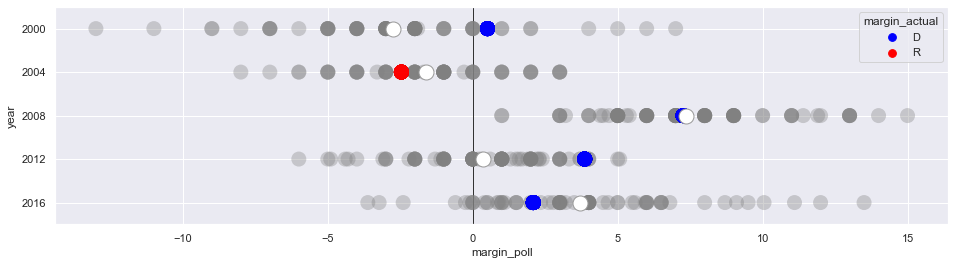

In [56]:
# plots margin_poll (grey), average of margin_poll (white), and margin_actual (blue/red)
margin_dotplot(pres_polls_national, x='margin_poll', y='year')

Have the polls been getting increasingly biased? Now that we've glanced at the data, lets calculate the average error.

In [59]:
pres_polls_national[['year', 'bias', 'error']].groupby('year').mean()

,bias,error
year,,
2000,-3.274062,4.021562
2004,0.855000,2.158333
2008,0.082857,2.302857
2012,-3.513837,3.578256
2016,1.618472,2.799583


## But, we don't have one Presidential election ... 
**we have 50 separate ones....**

...and the nationwide polls can only tell us so much about who might win the election. So what about state polling? Has it been getting better or worse over the years? Can we still rely on it this coming election cycle? 

Lets start by digging into 2016 state polls.


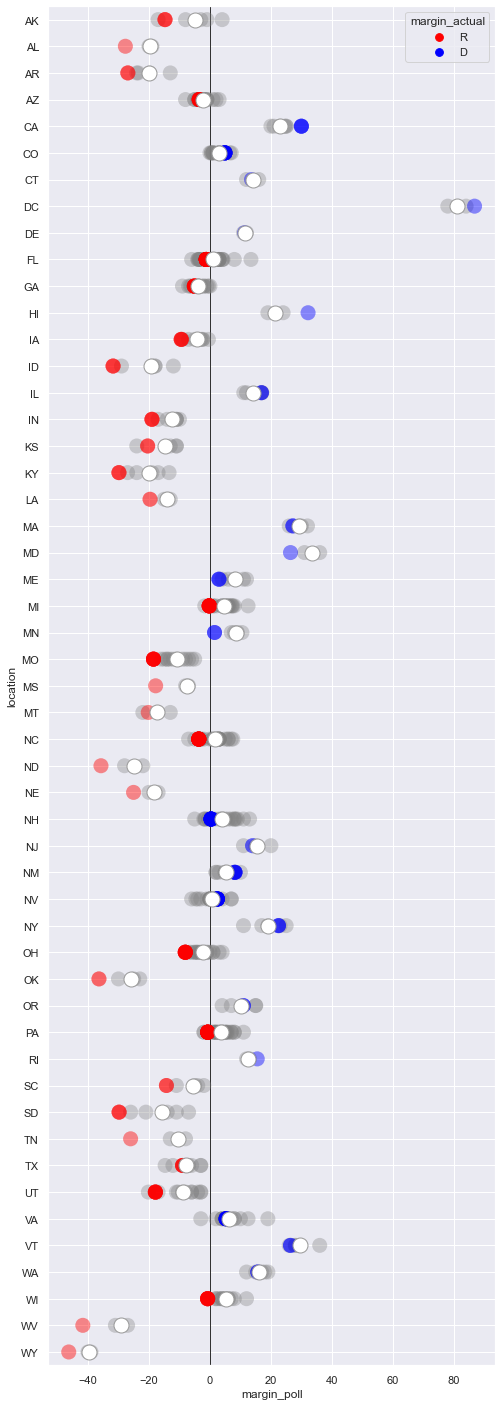

In [62]:
pres_polls_by_state_2016 = pres_polls_by_state[pres_polls_by_state.year == 2016]
margin_dotplot(pres_polls_by_state_2016, x='margin_poll', y='location', figsize=(8,25))

### Try it yourself! 

- Plot 2016 polls by pollster instead of state
- Look at a state with a big miss or very accurate polling in 2016
    - Filter down to that state and look at polling across all years. 
    - Does that state have a history of more or less accurate polling?
    - Check out some other states you think might be interesting.
    - Tell me about Hawaii.

Bonus: 
- Look into Senate polling from 2016. How did the polls fare?
    


## Ok, cool. But back to our question. Has statewide polling been getting more or less reliable?

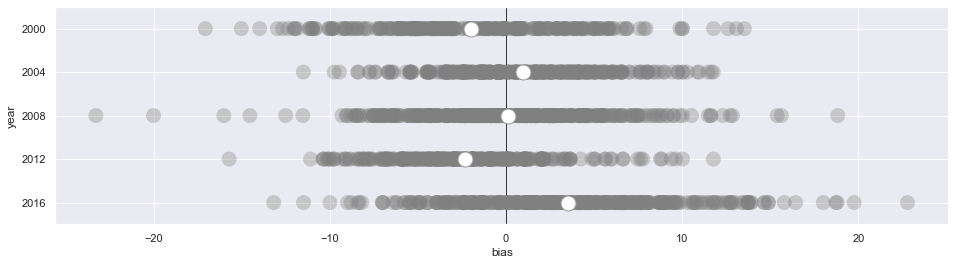

In [7]:
dotplot(pres_polls_by_state, x='bias', y='year', figsize=(16,4))

In [8]:
pres_polls_by_state[['year', 'bias']].groupby('year').mean()

,bias
year,
2000,-1.966633
2004,0.989412
2008,0.089742
2012,-2.328907
2016,3.535924


# Part 2: Statistical Treatment

Statistical treatment can help you get more out of a dataset! Sometimes the polls miss, but have consistent biases one way or another. If we can detect these patterns, we can correct for them and get more out of the data. Here is one example of how.

https://fivethirtyeight.com/features/how-fivethirtyeight-calculates-pollster-ratings/

In [9]:
polls = pd.read_csv('raw-polls.csv')
pollster_ratings = pd.read_csv('pollster-ratings.csv').set_index('Pollster Rating ID')

In [10]:
# Append grade
polls['grade'] = polls.pollster_rating_id.apply(lambda x: pollster_ratings.loc[x]['538 Grade'] if x in pollster_ratings.index else None)

# Append MRB and chnage it to an integer value
polls['mrb'] = polls.pollster_rating_id.apply(lambda x: pollster_ratings.loc[x]['Mean-Reverted Bias'] if x in pollster_ratings.index else None)
polls['mrb'] = pd.to_numeric(polls['mrb'].str.replace('D +', '', regex=False).str.replace('R +', '-', regex=False))

# Adjust poll, bias, and error by MRB
polls['margin_poll_adjusted'] = polls['margin_poll'] - polls['mrb']
polls['bias_adjusted'] = polls.margin_poll_adjusted - polls.margin_actual
polls['error_adjusted'] = np.abs(polls.margin_poll_adjusted - polls.margin_actual)

# Select all state and national polls
pres_polls_national = polls[(polls.type_detail=='Pres-G') & (polls.location == 'US')]
pres_polls_by_state = polls[(polls.type_detail=='Pres-G') & (polls.location != 'US')]

# Select 2016 state and national polls
pres_polls_national_2016 = pres_polls_national[pres_polls_national.year == 2016]
pres_polls_by_state_2016 = pres_polls_by_state[pres_polls_by_state.year == 2016]

In [11]:
pres_polls_national_2016[['bias', 'bias_adjusted']].mean()

bias             1.618472
bias_adjusted    1.218472
dtype: float64

In [12]:
pres_polls_by_state_2016[['bias', 'bias_adjusted']].mean()

bias             3.535924
bias_adjusted    2.008937
dtype: float64

Hey cool! Adjustment improves the polls. Lets apply it EVERYWHERE!!!

In [13]:
tmpdf = pres_polls_by_state_2016.groupby('location') # 'error': 'mean', 'error_adjusted': 'mean'

tmpdf = pd.concat([
    tmpdf.agg({'bias': 'mean', 'bias_adjusted': 'mean'}),
    pd.DataFrame(tmpdf.size()),
], axis=1)
tmpdf['difference'] = np.abs(tmpdf.bias) - np.abs(tmpdf.bias_adjusted)
tmpdf.sort_values(by=0, ascending=False)

,bias,bias_adjusted,0,difference
location,,,,
FL,2.293030,1.744545,33,0.548485
PA,4.463704,3.845185,27,0.618519
NC,5.382083,4.840417,24,0.541667
NV,-1.867619,-2.277143,21,-0.409524
NH,3.685263,2.853684,19,0.831579
MI,4.985789,4.064737,19,0.921053
VA,1.062353,0.109412,17,0.952941
AZ,1.375000,0.406250,16,0.968750
OH,5.939375,5.195625,16,0.743750


Ok, so maybe it only sometimes improves the polls? Lets look at a few particular cases.

In [14]:
pres_polls_by_state_2016[pres_polls_by_state_2016.location == "DC"][['pollster', 'grade', 'margin_actual', 'margin_poll', 'margin_poll_adjusted', 'mrb', 'bias', 'bias_adjusted']]

,pollster,grade,margin_actual,margin_poll,margin_poll_adjusted,mrb,bias,bias_adjusted
7929,SurveyMonkey,D-,86.78,84.0,78.9,5.1,-2.78,-7.88
8322,SurveyMonkey,D-,86.78,78.0,72.9,5.1,-8.78,-13.88


Still, in the aggregate, you're better off looking at an adjusted average of the polls.

## Polls Stories

- https://fivethirtyeight.com/features/how-much-the-polls-missed-by-in-every-state/
- https://fivethirtyeight.com/features/pollsters-probably-didnt-talk-to-enough-white-voters-without-college-degrees/
- https://fivethirtyeight.com/features/what-a-difference-2-percentage-points-makes/
- https://fivethirtyeight.com/features/shy-voters-probably-arent-why-the-polls-missed-trump/
- https://fivethirtyeight.com/features/the-polls-missed-trump-we-asked-pollsters-why/
- https://fivethirtyeight.com/features/why-fivethirtyeight-gave-trump-a-better-chance-than-almost-anyone-else/
- https://fivethirtyeight.com/features/the-polls-are-all-right/
- https://fivethirtyeight.com/features/trump-is-just-a-normal-polling-error-behind-clinton/


# The 2018 FiveThirtyEight Forecasts

- https://projects.fivethirtyeight.com/2018-midterm-election-forecast/senate
- https://projects.fivethirtyeight.com/2018-midterm-election-forecast/house

# Some other folks

- [CNN](https://www.cnn.com/election/2018/forecast)
- [Daily Kos](https://elections.dailykos.com/)
- [New York Times - Real Time Polling!](https://www.nytimes.com/interactive/2018/upshot/elections-polls.html)


# Visualizing Uncertainty

- FiveThirtyEight in [2010](https://www.nytimes.com/elections/2010/forecasts/senate.html), [2014](https://fivethirtyeight.com/interactives/senate-forecast/), [2016](https://projects.fivethirtyeight.com/2016-election-forecast/), [2018](https://projects.fivethirtyeight.com/2018-midterm-election-forecast/house/)
    * I think 2010 still works in Safari...
- New York Times
    * The Spinners https://www.nytimes.com/2014/11/01/upshot/how-confirmation-bias-can-lead-to-a-spinning-of-wheels.html
    * The Needle https://www.youtube.com/watch?v=iq5rW6zYeP4
- [Huffpost's](http://elections.huffingtonpost.com/pollster) custom charts.

